In [25]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
spark=SparkSession.builder.appName("Analysis").getOrCreate()

22/04/11 21:46:31 WARN Utils: Your hostname, pop-os resolves to a loopback address: 127.0.1.1; using 192.168.1.5 instead (on interface wlo1)
22/04/11 21:46:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/04/11 21:46:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df_ResultData=spark.read.csv("Results_Data.csv",header=True,inferSchema=True)


In [4]:
df_ResultData.show(10)

+----------+--------+---+---+---+------+-----+-----+--------+
|       USN|   SCODE|CIE|SEE|TOT|RESULT|GRADE| DATE|ExamType|
+----------+--------+---+---+---+------+-----+-----+--------+
|4JN18CS001| 18MAT11| 32| 41| 73|     P|    8|12019| Regular|
|4JN18CS001| 18PHY12| 29| 47| 76|     P|    8|12019| Regular|
|4JN18CS001| 18ELE13| 25| 43| 68|     P|    7|12019| Regular|
|4JN18CS001| 18CIV14| 31| 26| 57|     P|    6|12019| Regular|
|4JN18CS001|18EGDL15| 31| 56| 87|     P|    9|12019| Regular|
|4JN18CS001|18PHYL16| 32| 40| 72|     P|    8|12019| Regular|
|4JN18CS001|18ELEL17| 34| 52| 86|     P|    9|12019| Regular|
|4JN18CS001| 18EGH18| 27| 32| 59|     P|    6|12019| Regular|
|4JN18CS002| 18MAT11| 33| 51| 84|     P|    9|12019| Regular|
|4JN18CS002| 18PHY12| 36| 45| 81|     P|    9|12019| Regular|
+----------+--------+---+---+---+------+-----+-----+--------+
only showing top 10 rows



In [5]:
from pyspark.sql.functions import col, when

valueWhenTrue = "F"  # for example

df_ResultData=df_ResultData.withColumn(
    "RESULT",
    when(
        col("RESULT") == 'A',
        valueWhenTrue
    ).otherwise(col("RESULT"))
)

In [6]:
df_ResultData.show()

+----------+--------+---+---+---+------+-----+-----+--------+
|       USN|   SCODE|CIE|SEE|TOT|RESULT|GRADE| DATE|ExamType|
+----------+--------+---+---+---+------+-----+-----+--------+
|4JN18CS001| 18MAT11| 32| 41| 73|     P|    8|12019| Regular|
|4JN18CS001| 18PHY12| 29| 47| 76|     P|    8|12019| Regular|
|4JN18CS001| 18ELE13| 25| 43| 68|     P|    7|12019| Regular|
|4JN18CS001| 18CIV14| 31| 26| 57|     P|    6|12019| Regular|
|4JN18CS001|18EGDL15| 31| 56| 87|     P|    9|12019| Regular|
|4JN18CS001|18PHYL16| 32| 40| 72|     P|    8|12019| Regular|
|4JN18CS001|18ELEL17| 34| 52| 86|     P|    9|12019| Regular|
|4JN18CS001| 18EGH18| 27| 32| 59|     P|    6|12019| Regular|
|4JN18CS002| 18MAT11| 33| 51| 84|     P|    9|12019| Regular|
|4JN18CS002| 18PHY12| 36| 45| 81|     P|    9|12019| Regular|
|4JN18CS002| 18ELE13| 37| 31| 68|     P|    7|12019| Regular|
|4JN18CS002| 18CIV14| 34| 29| 63|     P|    7|12019| Regular|
|4JN18CS002|18EGDL15| 34| 55| 89|     P|    9|12019| Regular|
|4JN18CS

In [53]:
x = ['Pass','Fail']
x_pos = [i for i, _ in enumerate(x)]

In [43]:
y=[df_ResultData.filter(df_ResultData.RESULT == "P").count(),df_ResultData.filter(df_ResultData.RESULT == "F").count()]


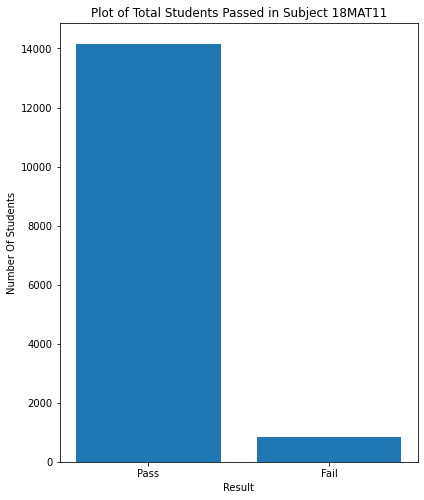

In [108]:
def subcode(subname):
    fig = plt.figure()
    plt.title('Plot of Total Students Passed in Subject '+ subname)
    plt.xlabel('Result')
    plt.ylabel('Number Of Students')
    plt.bar(x,y)
    plt.xticks(x_pos, x)
    plt.tight_layout()
    fig.set_figheight(8)
    fig.set_figwidth(6)
    plt.show()
subcode("18MAT11")